### 金融风控相关业务介绍

- 早期信贷风控怎么做？
  - 人审靠业务经验，效率低
  - 不适用于移动互联网时代的金融场景
- 建模的概念
  - 建模就是构造一个数学公式，将我们手上有的数据输入进去，通过计算得到预测结果
  - 风控模型最原始的思路就是输入用户的信息，得到这个人 “会还钱” 还是 “不会还钱”。这就是个二分类问题。
  - 而评分卡模型就是希望能将一系列的个人信息输入模型，然后得到一个用户的还款概率
    - 概率越大，评分越高，越容易还钱
    - 概率越小，评分越低，越容易跑路
    - 典型例子就是芝麻信用分。
- 为什么一定要应射成某种分数呢
  - 有分数刻度的好处
  - 我们可以随时根据业务需求调整通过率
  - 更容易向用户解释他的信用评级
  - 更容易向领导解释一个用户被拒绝的原因
  - 更容易监控一个模型的效果
- 风控流程
  风控的角度来看，基本上可以归结为以下几个部分：
  数据采集
  反欺诈
  策略
  模型
  催收
- 数据采集
  数据采集会涉及到埋点和爬虫技术，基本上业内的数据都大同小异。免费的运营商数据、和安卓可爬的手机内部信息（app名称，手机设备信息，部分app内容信息）、以及收费的征信数据、各种信息校验、外部黑名单之类的。还有一些特定场景的现金贷和消费金融会有自有的数据可供使用，比如阿里京东自己的电商数据、滴滴的司机数据、顺丰中通的快递数据等等。由于不涉及爬虫，这一块主要让大家理解一下都可以做些什么变量。
- 反欺诈引擎
  反欺诈引擎主要包括两个部分，反欺诈规则和反欺诈模型。这里其实很少使用传统监督模型。涉及到的算法以无监督算法、社交网络算法、深度学习居多。大部分的公司都使用的是反欺诈规则，这也是主要提倡的。一个原因是欺诈标签不好得到，很难做监督学习的训练。还有一个原因是传统的机器学习对欺诈的检测效果很差。因为所谓欺诈，就是一些黑产或者个人将自己包装成信用良好的用户，进行借款后失联或者拒不还钱。既然都伪装成了好客户，基于风控人员主观思考建立的统计模型，又怎么可能有好的效果。但是经过一段时间的实验，这一块其实用深度学习反而有意想不到的效果，基本思想可以理解为，简单评分卡解释性强，带来的坏处就是可以被逆向破解，而复杂模型的黑箱操作虽然解释性差，却有一定的安全性，尤其是搭配了在线学习等动态手段之后。反向破解的成本极高。此外还有很多算法诸如异常检测和知识图谱都在这一块有所应用。
- 规则引擎
  规则引擎其实就是我们常说的策略，主要通过数据分析、挖掘手段以及一些监督、无监督算法，得到不同字段、各个区间的坏账率（badrate），找到最佳分段区间，然后得到筛选后信用较好的一批特定人群进行放款。这一块主要有单变量分析和一些关键指标的计算和监控，比如Rollrate、PSI、KS、AUC，等等。通常规则和模型是组合使用的，尤其在反欺诈场景中。
- 风控模型
  风控模型是机器学习在风控领域的主要体现。当然前面提到的反欺诈模型也是重点之一。主要是通过监督算法构建违约概率预测模型。但是因为实际业务中，是数据的质量并不是永远那么完美，这里通常我们会使用到深度学习、无监督、弱监督等等方法去辅助 传统监督学习算法。
  风控模型其中包含了A/B/C卡。模型算法之间可以没有显著区别，而是根据其发生的时间点不同而进行划分的
  - 贷前  申请评分卡 Application score card    A卡可以用客户历史逾期天数最大的天数
  - 贷中  行为评分卡 Behavior score card       B卡则可以多期借款中逾期最大的一次
  - 贷后   催收评分卡  Collection score card   C卡 是否被内催催回来定义y
  - 也就是y产生的方式不一样。通常信贷领域都是用逾期天数来定义y
  - C卡因为用途不同有不同的建立方法。比如你们公司有内催，有外催。外催肯定是回款率低，单价贵的。那么就可以根据是否被内催催回来定义y。
- 催收
  催收是风控的最终手段。这个环节可以产生很多对模型有帮助的数据。比如催收记录的文字描述、触达率、欺诈标签等等。并且坏账的客户会被列入黑名单。其实只要是能被催回来的，都不是坏账。但是很多公司为了保险起见，逾期超过一定时间的客户，即使被催回来，也会被拉入黑名单。这里主要的算法就是催收模型相关的，可能是监督、无监督算法。也有基于社交网络算法构造的失联模型等等。
- 几个概念
  Badrate： 坏人占比
  MOB (month on book)：开卡时长
  Vintage分析法是一种动态分析法，用来分析不同时期资产的表现情况，它以贷款的账龄为基础，观察每批放款贷后1,2,3…N个月时的逾期情况。
  Roll-Rate分析追溯贷款状态之间每月的迁移情况，展示了每批贷款进入下一个逾期状态的概率。

### 金融反欺诈 常用特征处理方法

#### 用户基本属性

phone_nember

- 手机号前缀，归属地是否相同
- 是否是虚拟运营商
- 流量卡还是通话卡

电话本备注 nickname

- 昵称符合固定的规律（中文+数字）
- 备注是否符合某种亲密的称呼

birthday

- 年纪  星座 生肖

sex

- 性别是否失衡

password

- 是否都相同

身份证号码

- 年龄 核对
- 性别 核对
- 城市

邮箱

- 是否是一次性邮箱
- username 满足规律
- 是否同一邮箱服务商
- 邮箱里面的数据（账单）

学历

- 相似性

住房

- 租房情况是否雷同

积分

- 是不是超过某个阈值

签到

- 相似性

ip

- 是否是同一个号段
- 每次登录ip地址是否相同
- 是不是临时ip 和 gps
- ip 和 gps 是否能对的上

gps

- 经纬度相似性分析
- 国家 省份 城市 相似性
- ip 和 gps 是否能对的上

wifi

- ssid
- wifi list
- 贷款前的几分钟有没有切换过wifi

application time

- 时间切片
- 注册用了多长时间（太快太慢都有问题）
- 一共申请了几次

login time

- 时间切片
- 登陆了几次、频率
- 最后一次登录时间距贷款时间的间隔
- 同一时间登录做一个校验（同一时间多人登录）

ua（user agent）

- 每次打开是否是同一个ua

渠道

- app/H5/微信
- 渠道ID属于违规渠道

app version

- 每次app的版本号是否相同
- app版本会不会太老了（老版本的app有bug，可能会被黑中介用来攻击我们）

推荐人/联系人

- 名字匹配
- 手机号匹配

#### 设备指纹

imei

- 否都相同
- 每次登录imei号是否都相同

device id

- 否都相同
- 每次登录device id号是否都相同

分辨率

- 手机型号和屏幕分辨率是否一致

mobile type

- 手机品牌
- 手机型号

os（operating system）

- 每次打开操作系统是否都相同
- 来申请的人是否os都相同
- os的版本是否太旧

#### 中文错别字可以考虑转换成拼音做相似度匹配

address

- 地址要标准化
- 模糊匹配
- 相似度计算（cos距离，词向量）

company

- 正则
- 字节拆分
- 关键字提取
- 相似度计算
- 错别字/同音字识别

#### 第三方数据

人行征信

- 公司信息是否一致
- 学历是否一致
- 居住地址是否一致
- 手机号码是否一致
- 逾期数据

运营商

- 是否有相同的联系人
- 是否有黑名单客户在通讯录中
- 通话最频繁的几个人（所在地是否和他相同）

社保公积金

- 工资
- 社保
- 公积金



#### 特征工程

特征选择 (feature_selection)

#### Filter

1. 移除低方差的特征 (Removing features with low variance)
2. 单变量特征选择 (Univariate feature selection)

#### Wrapper

1. 递归特征消除 (Recursive Feature Elimination)

#### Embedded

1. 使用SelectFromModel选择特征 (Feature selection using SelectFromModel)
2. 将特征选择过程融入pipeline (Feature selection as part of a pipeline)

当数据预处理完成后，我们需要选择有意义的特征输入机器学习的算法和模型进行训练。

通常来说，从两个方面考虑来选择特征：

#### 特征是否发散

如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。

#### 特征与目标的相关性

这点比较显见，与目标相关性高的特征，应当优选选择。除移除低方差法外，本文介绍的其他方法均从相关性考虑。

根据特征选择的形式又可以将特征选择方法分为3种：

- Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
- Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
- Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。

特征选择主要有两个目的：

- 减少特征数量、降维，使模型泛化能力更强，减少过拟合；
- 增强对特征和特征值之间的理解。

拿到数据集，一个特征选择方法，往往很难同时完成这两个目的。通常情况下，选择一种自己最熟悉或者最方便的特征选择方法（往往目的是降维，而忽略了对特征和数据理解的目的）。接下来将结合 Scikit-learn提供的例子 介绍几种常用的特征选择方法，它们各自的优缺点和问题。

### Filter

#### 1）移除低方差的特征 (Removing features with low variance)

假设某特征的特征值只有0和1，并且在所有输入样本中，95%的实例的该特征取值都是1，那就可以认为这个特征作用不大。如果100%都是1，那这个特征就没意义了。当特征值都是离散型变量的时候这种方法才能用，如果是连续型变量，就需要将连续变量离散化之后才能用。而且实际当中，一般不太会有95%以上都取某个值的特征存在，所以这种方法虽然简单但是不太好用。可以把它作为特征选择的预处理，先去掉那些取值变化小的特征，然后再从接下来提到的的特征选择方法中选择合适的进行进一步的特征选择。

In [3]:

```python
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
```

Out[3]:

```
array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])
```

果然, VarianceThreshold 移除了第一列特征，第一列中特征值为0的概率达到了5/6.

#### 2）单变量特征选择 (Univariate feature selection)

单变量特征选择的原理是分别单独的计算每个变量的某个统计指标，根据该指标来判断哪些变量重要，剔除那些不重要的变量。

对于分类问题(y离散)，可采用：

- 卡方检验

对于回归问题(y连续)，可采用：

- 皮尔森相关系数
- f_regression,
- mutual_info_regression
- 最大信息系数

这种方法比较简单，易于运行，易于理解，通常对于理解数据有较好的效果（但对特征优化、提高泛化能力来说不一定有效）。

- SelectKBest 移除得分前 k 名以外的所有特征(取top k)
- SelectPercentile 移除得分在用户指定百分比以后的特征(取top k%)
- 对每个特征使用通用的单变量统计检验： 假正率(false positive rate) SelectFpr, 伪发现率(false discovery rate) SelectFdr, 或族系误差率 SelectFwe.
- GenericUnivariateSelect 可以设置不同的策略来进行单变量特征选择。同时不同的选择策略也能够使用超参数寻优，从而让我们找到最佳的单变量特征选择策略。

#### 卡方(Chi2)检验

经典的卡方检验是检验定性自变量对定性因变量的相关性。比如，我们可以对样本进行一次chi2 测试来选择最佳的两项特征：

In [4]:

```python
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
X.shape
```

Out[4]:

```
(150, 4)
```

In [5]:

```python
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape
```

Out[5]:

```
(150, 2)
```

#### Pearson相关系数 (Pearson Correlation)

皮尔森相关系数是一种最简单的，能帮助理解特征和响应变量之间关系的方法，该方法衡量的是变量之间的线性相关性，结果的取值区间为[-1，1]，-1表示完全的负相关，+1表示完全的正相关，0表示没有线性相关。

In [8]:

```python
import numpy as np
from scipy.stats import pearsonr
np.random.seed(0)
size = 300
x = np.random.normal(0, 1, size)
# pearsonr(x, y)的输入为特征矩阵和目标向量，能够同时计算 相关系数 和p-value.
print("Lower noise", pearsonr(x, x + np.random.normal(0, 1, size)))
print("Higher noise", pearsonr(x, x + np.random.normal(0, 10, size)))
Lower noise (0.7182483686213841, 7.32401731299835e-49)
Higher noise (0.057964292079338155, 0.3170099388532475)
```

这个例子中，我们比较了变量在加入噪音之前和之后的差异。当噪音比较小的时候，相关性很强，p-value很低。

我们使用Pearson相关系数主要是为了看特征之间的相关性，而不是和因变量之间的。

### Wrapper

#### 递归特征消除 (Recursive Feature Elimination)

递归消除特征法使用一个基模型来进行多轮训练，每轮训练后，移除若干权值系数的特征，再基于新的特征集进行下一轮训练。

对特征含有权重的预测模型(例如，线性模型对应参数coefficients)，RFE通过递归减少考察的特征集规模来选择特征。首先，预测模型在原始特征上训练，每个特征指定一个权重。之后，那些拥有最小绝对值权重的特征被踢出特征集。如此往复递归，直至剩余的特征数量达到所需的特征数量。

RFECV 通过交叉验证的方式执行RFE，以此来选择最佳数量的特征：对于一个数量为d的feature的集合，他的所有的子集的个数是2的d次方减1(包含空集)。指定一个外部的学习算法，比如SVM之类的。通过该算法计算所有子集的validation error。选择error最小的那个子集作为所挑选的特征。

In [29]:

```python
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

rf = RandomForestClassifier()
iris=load_iris()
X,y=iris.data,iris.target
rfe = RFE(estimator=rf, n_features_to_select=3)
X_rfe = rfe.fit_transform(X,y)
X_rfe.shape
```

Out[29]:

```
(150, 3)
```

In [30]:

```
X_rfe[:5,:]
```

Out[30]:

```
array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])
```

In [ ]:

```
#### Embedded

使用SelectFromModel选择特征 (Feature selection using SelectFromModel)
```

#### 基于L1的特征选择 (L1-based feature selection)

使用L1范数作为惩罚项的线性模型(Linear models)会得到稀疏解：大部分特征对应的系数为0。当你希望减少特征的维度以用于其它分类器时，可以通过 feature_selection.SelectFromModel 来选择不为0的系数。

特别指出，常用于此目的的稀疏预测模型有 linear_model.Lasso（回归）， linear_model.LogisticRegression 和 svm.LinearSVC（分类）

In [31]:

```python
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)
model = SelectFromModel(lsvc, prefit=True)
X_embed = model.transform(X)
X_embed.shape
```

Out[31]:

```python
(150, 3)
```

In [32]:

```
X_embed[:5,:]
```

Out[32]:

```
array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])
```

#### 工作中的套路

模型上线后可能会遇到的问题：

- 模型效果不好
- 训练集效果好，跨时间测试效果不好
- 跨时间测试效果也好，上线之后效果不好
- 上线之后效果还好，几周之后分数分布开始下滑
- 一两个月内都比较稳定，突然分数分布骤降
- 没有明显问题，但模型每个月逐步失效

考虑一下业务所需要的变量是什么。

- 变量必须对模型有贡献，也就是说必须能对客群加以区分
- 逻辑回归要求变量之间线性无关
- 逻辑回归评分卡也希望变量呈现单调趋势 （有一部分也是业务原因，但从模型角度来看，单调变量未必一定比有转折的变量好）
- 客群在每个变量上的分布稳定，分布迁移无可避免，但不能波动太大

从上述方法中找到最贴合当前使用场景的几种方法。

In [29]:

```python
import pandas as pd
import numpy as np
df_train = pd.read_csv('train.csv')
df_train.head()
```

Out[29]:

|      | PassengerId | label | Pclass |                                              Name |    Sex |  Age | SibSp | Parch |           Ticket |    Fare | Cabin | Embarked |
| ---: | ----------: | ----: | -----: | ------------------------------------------------: | -----: | ---: | ----: | ----: | ---------------: | ------: | ----: | -------: |
|    0 |           1 |     0 |      3 |                           Braund, Mr. Owen Harris |   male | 22.0 |     1 |     0 |        A/5 21171 |  7.2500 |   NaN |        S |
|    1 |           2 |     1 |      1 | Cumings, Mrs. John Bradley (Florence Briggs Th... | female | 38.0 |     1 |     0 |         PC 17599 | 71.2833 |   C85 |        C |
|    2 |           3 |     1 |      3 |                            Heikkinen, Miss. Laina | female | 26.0 |     0 |     0 | STON/O2. 3101282 |  7.9250 |   NaN |        S |
|    3 |           4 |     1 |      1 |      Futrelle, Mrs. Jacques Heath (Lily May Peel) | female | 35.0 |     1 |     0 |           113803 | 53.1000 |  C123 |        S |
|    4 |           5 |     0 |      3 |                          Allen, Mr. William Henry |   male | 35.0 |     0 |     0 |           373450 |  8.0500 |   NaN |        S |

1）变量重要性

- 卡方检验
- 模型筛选

2）共线性

- 相关系数 COR

在做很多基于空间划分思想的模型的时候，我们必须关注变量之间的相关性。单独看两个变量的时候我们会使用皮尔逊相关系数。

In [6]:

```
df_train.corr()
```

Out[6]:

|             | PassengerId |     label |    Pclass |       Age |     SibSp |     Parch |      Fare |
| ----------: | ----------: | --------: | --------: | --------: | --------: | --------: | --------: |
| PassengerId |    1.000000 | -0.005007 | -0.035144 |  0.036847 | -0.057527 | -0.001652 |  0.012658 |
|       label |   -0.005007 |  1.000000 | -0.338481 | -0.077221 | -0.035322 |  0.081629 |  0.257307 |
|      Pclass |   -0.035144 | -0.338481 |  1.000000 | -0.369226 |  0.083081 |  0.018443 | -0.549500 |
|         Age |    0.036847 | -0.077221 | -0.369226 |  1.000000 | -0.308247 | -0.189119 |  0.096067 |
|       SibSp |   -0.057527 | -0.035322 |  0.083081 | -0.308247 |  1.000000 |  0.414838 |  0.159651 |
|       Parch |   -0.001652 |  0.081629 |  0.018443 | -0.189119 |  0.414838 |  1.000000 |  0.216225 |
|        Fare |    0.012658 |  0.257307 | -0.549500 |  0.096067 |  0.159651 |  0.216225 |  1.000000 |

3）单调性

- bivar图

```python
# 等频切分
df_train.loc[:,'fare_qcut'] = pd.qcut(df_train['Fare'], 10)
df_train.head()
df_train = df_train.sort_values('Fare')
alist = list(set(df_train['fare_qcut']))
badrate = {}
for x in alist:
    
    a = df_train[df_train.fare_qcut == x]
    
    bad = a[a.label == 1]['label'].count()
    good = a[a.label == 0]['label'].count()
    
    badrate[x] = bad/(bad+good)
f = zip(badrate.keys(),badrate.values())
f = sorted(f,key = lambda x : x[1],reverse = True )
badrate = pd.DataFrame(f)
badrate.columns = pd.Series(['cut','badrate'])
badrate = badrate.sort_values('cut')
print(badrate)
badrate.plot('cut','badrate')


                 cut   badrate
9     (-0.001, 7.55]  0.141304
6      (7.55, 7.854]  0.298851
8      (7.854, 8.05]  0.179245
7       (8.05, 10.5]  0.230769
3     (10.5, 14.454]  0.428571
4   (14.454, 21.679]  0.420455
2     (21.679, 27.0]  0.516854
5     (27.0, 39.688]  0.373626
1   (39.688, 77.958]  0.528090
0  (77.958, 512.329]  0.758621
```

Out:

```
<matplotlib.axes._subplots.AxesSubplot at 0x168263d8cf8>
```

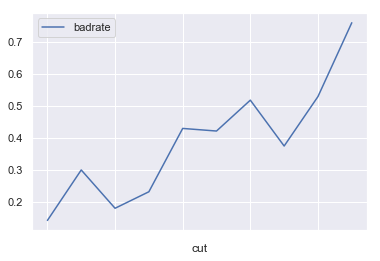

4）稳定性

- PSI
- 跨时间交叉检验

#### 跨时间交叉检验

就是将样本按照月份切割，一次作为训练集和测试集来训练模型，取进入模型的变量之间的交集，但是要小心共线特征！

解决方法

- 不需要每次都进入模型，大部分都在即可
- 先去除共线性（这也是为什么集成模型我们也会去除共线性）

#### 群体稳定性指标(population stability index)

公式：

𝑃𝑆𝐼=∑(实际占比−预期占比)∗ln(实际占比预期占比)PSI=∑(实际占比−预期占比)∗ln⁡(实际占比预期占比)

来自知乎的例子：
比如训练一个logistic回归模型，预测时候会有个概率输出p。
测试集上的输出设定为p1，将它从小到大排序后10等分，如0-0.1,0.1-0.2,......。
用这个模型去对新的样本进行预测，预测结果叫p2,按p1的区间也划分为10等分。
实际占:是p2上在各区间的用户占比

预期占:p1上在各区间的用户占比。
意义就是如果模型很稳定，那么p1和p2上各区间的用户应该是相近的，占比不会变动很大，也就是预测出来的概率不会差距很大。
一般认为psi小于0.1时候模型稳定性很高，0.1-0.25一般，大于0.25模型稳定性差，建议重做。

注意分箱的数量将会影响着变量的PSI值。

PSI并不只可以对模型来求，对变量来求也一样。只需要对跨时间分箱的数据分别求PSI即可。





### 案例

```python
import pandas as pd
import numpy as np
data = pd.read_excel('oil_data_for_tree.xlsx')
data.head()
```



|      |      uid | oil_actv_dt |  create_dt | total_oil_cnt | pay_amount_total | class_new | bad_ind | oil_amount | discount_amount | sale_amount |    amount | pay_amount | coupon_amount | payment_coupon_amount | channel_code | oil_code | scene | source_app | call_source |
| ---: | -------: | ----------: | ---------: | ------------: | ---------------: | --------: | ------: | ---------: | --------------: | ----------: | --------: | ---------: | ------------: | --------------------: | -----------: | -------: | ----: | ---------: | ----------: |
|    0 | A8217710 |  2018-08-19 | 2018-08-17 |         275.0 |       48295495.4 |         B |       0 |    3308.56 |       1760081.0 |   1796001.0 | 1731081.0 |  8655401.0 |           1.0 |                   1.0 |            1 |        3 |     2 |          0 |           3 |
|    1 | A8217710 |  2018-08-19 | 2018-08-16 |         275.0 |       48295495.4 |         B |       0 |    4674.68 |       2487045.0 |   2537801.0 | 2437845.0 | 12189221.0 |           1.0 |                   1.0 |            1 |        3 |     2 |          0 |           3 |
|    2 | A8217710 |  2018-08-19 | 2018-08-15 |         275.0 |       48295495.4 |         B |       0 |    1873.06 |        977845.0 |    997801.0 |  961845.0 |  4809221.0 |           1.0 |                   1.0 |            1 |        2 |     2 |          0 |           3 |
|    3 | A8217710 |  2018-08-19 | 2018-08-14 |         275.0 |       48295495.4 |         B |       0 |    4837.78 |       2526441.0 |   2578001.0 | 2484441.0 | 12422201.0 |           1.0 |                   1.0 |            1 |        2 |     2 |          0 |           3 |
|    4 | A8217710 |  2018-08-19 | 2018-08-13 |         275.0 |       48295495.4 |         B |       0 |    2586.38 |       1350441.0 |   1378001.0 | 1328441.0 |  6642201.0 |           1.0 |                   1.0 |            1 |        2 |     2 |          0 |           3 |

In [32]:

```
set(data.class_new)
```

Out[32]:

```
{'A', 'B', 'C', 'D', 'E', 'F'}
```

org_lst 不需要做特殊变换，直接去重
agg_lst 数值型变量做聚合
dstc_lst 文本型变量做cnt

In [33]:

```python
org_lst = ['uid','create_dt','oil_actv_dt','class_new','bad_ind']
agg_lst = ['oil_amount','discount_amount','sale_amount','amount','pay_amount','coupon_amount','payment_coupon_amount']
dstc_lst = ['channel_code','oil_code','scene','source_app','call_source']
```

数据重组

In [34]:

```python
df = data[org_lst].copy()
df[agg_lst] = data[agg_lst].copy()
df[dstc_lst] = data[dstc_lst].copy()
```

看一下缺失情况

In [35]:

```python
df.isna().sum()
```

Out[35]:

```
uid                         0
create_dt                4944
oil_actv_dt                 0
class_new                   0
bad_ind                     0
oil_amount               4944
discount_amount          4944
sale_amount              4944
amount                   4944
pay_amount               4944
coupon_amount            4944
payment_coupon_amount    4946
channel_code                0
oil_code                    0
scene                       0
source_app                  0
call_source                 0
dtype: int64
```

看一下基础变量的describe

In [7]:

```
df.describe()
```

Out[7]:

|       |      bad_ind |   oil_amount | discount_amount |  sale_amount |       amount |   pay_amount | coupon_amount | payment_coupon_amount | channel_code |     oil_code |        scene |   source_app |  call_source |
| ----: | -----------: | -----------: | --------------: | -----------: | -----------: | -----------: | ------------: | --------------------: | -----------: | -----------: | -----------: | -----------: | -----------: |
| count | 50609.000000 | 45665.000000 |    4.566500e+04 | 4.566500e+04 | 4.566500e+04 | 4.566500e+04 |  45665.000000 |          45663.000000 | 50609.000000 | 50609.000000 | 50609.000000 | 50609.000000 | 50609.000000 |
|  mean |     0.017764 |   425.376107 |    1.832017e+05 | 1.881283e+05 | 1.808673e+05 | 9.043344e+05 |      0.576853 |            149.395397 |     1.476378 |     1.617894 |     1.906519 |     0.306072 |     2.900729 |
|   std |     0.132093 |   400.596244 |    2.007574e+05 | 2.048742e+05 | 1.977035e+05 | 9.885168e+05 |      0.494064 |            605.138823 |     1.511470 |     3.074166 |     0.367280 |     0.893682 |     0.726231 |
|   min |     0.000000 |     1.000000 |    0.000000e+00 | 0.000000e+00 | 1.000000e+00 | 5.000000e+00 |      0.000000 |              0.000000 |     0.000000 |     0.000000 |     0.000000 |     0.000000 |     0.000000 |
|   25% |     0.000000 |   175.440000 |    6.039100e+04 | 6.200100e+04 | 5.976100e+04 | 2.988010e+05 |      0.000000 |              1.000000 |     1.000000 |     0.000000 |     2.000000 |     0.000000 |     3.000000 |
|   50% |     0.000000 |   336.160000 |    1.229310e+05 | 1.279240e+05 | 1.209610e+05 | 6.048010e+05 |      1.000000 |              1.000000 |     1.000000 |     0.000000 |     2.000000 |     0.000000 |     3.000000 |
|   75% |     0.000000 |   557.600000 |    2.399050e+05 | 2.454010e+05 | 2.360790e+05 | 1.180391e+06 |      1.000000 |            100.000000 |     1.000000 |     0.000000 |     2.000000 |     0.000000 |     3.000000 |
|   max |     1.000000 |  7952.820000 |    3.916081e+06 | 3.996001e+06 | 3.851081e+06 | 1.925540e+07 |      1.000000 |          50000.000000 |     6.000000 |     9.000000 |     2.000000 |     3.000000 |     4.000000 |

```
对creat_dt做补全，用oil_actv_dt来填补
截取6个月的数据。  
构造变量的时候不能直接对历史所有数据做累加。  
否则随着时间推移，变量分布会有很大的变化。
```

In [37]:

```python
def time_isna(x,y):
    if str(x) == 'NaT':
        x = y
    else:
        x = x
    return x
df2 = df.sort_values(['uid','create_dt'],ascending = False)
df2['create_dt'] = df2.apply(lambda x: time_isna(x.create_dt,x.oil_actv_dt),axis = 1)
df2['dtn'] = (df2.oil_actv_dt - df2.create_dt).apply(lambda x :x.days)
df = df2[df2['dtn']<180]
df.head()
```

Out[37]:

|       |                uid |  create_dt | oil_actv_dt | class_new | bad_ind | oil_amount | discount_amount | sale_amount | amount | pay_amount | coupon_amount | payment_coupon_amount | channel_code | oil_code | scene | source_app | call_source |  dtn |
| ----: | -----------------: | ---------: | ----------: | --------: | ------: | ---------: | --------------: | ----------: | -----: | ---------: | ------------: | --------------------: | -----------: | -------: | ----: | ---------: | ----------: | ---: |
| 50608 | B96436391985035703 | 2018-10-08 |  2018-10-08 |         B |       0 |        NaN |             NaN |         NaN |    NaN |        NaN |           NaN |                   NaN |            6 |        9 |     2 |          3 |           4 |    0 |
| 50607 | B96436391984693397 | 2018-10-11 |  2018-10-11 |         E |       0 |        NaN |             NaN |         NaN |    NaN |        NaN |           NaN |                   NaN |            6 |        9 |     2 |          3 |           4 |    0 |
| 50606 | B96436391977217468 | 2018-10-17 |  2018-10-17 |         B |       0 |        NaN |             NaN |         NaN |    NaN |        NaN |           NaN |                   NaN |            6 |        9 |     2 |          3 |           4 |    0 |
| 50605 | B96436391976480892 | 2018-09-28 |  2018-09-28 |         B |       0 |        NaN |             NaN |         NaN |    NaN |        NaN |           NaN |                   NaN |            6 |        9 |     2 |          3 |           4 |    0 |
| 50604 | B96436391972106043 | 2018-10-19 |  2018-10-19 |         A |       0 |        NaN |             NaN |         NaN |    NaN |        NaN |           NaN |                   NaN |            6 |        9 |     2 |          3 |           4 |    0 |

对org_list变量求历史贷款天数的最大间隔，并且去重

In [38]:

```python
base = df[org_lst]
base['dtn'] = df['dtn']
base = base.sort_values(['uid','create_dt'],ascending = False)
base = base.drop_duplicates(['uid'],keep = 'first')
base.shape  
```

Out[38]:

```
(11099, 6)
```



In [39]:

```python
gn = pd.DataFrame()
for i in agg_lst:
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:len(df[i])).reset_index())
    tp.columns = ['uid',i + '_cnt']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.where(df[i]>0,1,0).sum()).reset_index())
    tp.columns = ['uid',i + '_num']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nansum(df[i])).reset_index())
    tp.columns = ['uid',i + '_tot']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmean(df[i])).reset_index())
    tp.columns = ['uid',i + '_avg']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmax(df[i])).reset_index())
    tp.columns = ['uid',i + '_max']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmin(df[i])).reset_index())
    tp.columns = ['uid',i + '_min']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanvar(df[i])).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmax(df[i]) -np.nanmin(df[i]) ).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
```

In [40]:

```
gn.columns
```

Out[40]:

```
Index(['uid', 'oil_amount_cnt', 'oil_amount_num', 'oil_amount_tot',
       'oil_amount_avg', 'oil_amount_max', 'oil_amount_min',
       'oil_amount_var_x', 'oil_amount_var_y', 'discount_amount_cnt',
       'discount_amount_num', 'discount_amount_tot', 'discount_amount_avg',
       'discount_amount_max', 'discount_amount_min', 'discount_amount_var_x',
       'discount_amount_var_y', 'sale_amount_cnt', 'sale_amount_num',
       'sale_amount_tot', 'sale_amount_avg', 'sale_amount_max',
       'sale_amount_min', 'sale_amount_var_x', 'sale_amount_var_y',
       'amount_cnt', 'amount_num', 'amount_tot', 'amount_avg', 'amount_max',
       'amount_min', 'amount_var_x', 'amount_var_y', 'pay_amount_cnt',
       'pay_amount_num', 'pay_amount_tot', 'pay_amount_avg', 'pay_amount_max',
       'pay_amount_min', 'pay_amount_var_x', 'pay_amount_var_y',
       'coupon_amount_cnt', 'coupon_amount_num', 'coupon_amount_tot',
       'coupon_amount_avg', 'coupon_amount_max', 'coupon_amount_min',
       'coupon_amount_var_x', 'coupon_amount_var_y',
       'payment_coupon_amount_cnt', 'payment_coupon_amount_num',
       'payment_coupon_amount_tot', 'payment_coupon_amount_avg',
       'payment_coupon_amount_max', 'payment_coupon_amount_min',
       'payment_coupon_amount_var_x', 'payment_coupon_amount_var_y'],
      dtype='object')
```

对dstc_lst变量求distinct个数

In [41]:

```python
gc = pd.DataFrame()
for i in dstc_lst:
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df: len(set(df[i]))).reset_index())
    tp.columns = ['uid',i + '_dstc']
    if gc.empty == True:
        gc = tp
    else:
        gc = pd.merge(gc,tp,on = 'uid',how = 'left')
```

将变量组合在一起

In [42]:

```python
fn = pd.merge(base,gn,on= 'uid')
fn = pd.merge(fn,gc,on= 'uid') 
fn.shape
```

Out[42]:

```
(11099, 67)
```

In [43]:

```
fn = fn.fillna(0)
```

In [14]:

```
fn.head(100)
```

Out[14]:

|      |                uid |  create_dt | oil_actv_dt | class_new | bad_ind |  dtn | oil_amount_cnt | oil_amount_num | oil_amount_tot | oil_amount_avg |  ... | payment_coupon_amount_max | payment_coupon_amount_min | payment_coupon_amount_var_x | payment_coupon_amount_var_y | payment_coupon_amount_var | channel_code_dstc | oil_code_dstc | scene_dstc | source_app_dstc | call_source_dstc |
| ---: | -----------------: | ---------: | ----------: | --------: | ------: | ---: | -------------: | -------------: | -------------: | -------------: | ---: | ------------------------: | ------------------------: | --------------------------: | --------------------------: | ------------------------: | ----------------: | ------------: | ---------: | --------------: | ---------------: |
|    0 | B96436391985035703 | 2018-10-08 |  2018-10-08 |         B |       0 |    0 |              1 |              0 |           0.00 |           0.00 |  ... |                       0.0 |                       0.0 |                         0.0 |                         0.0 |                       0.0 |                 1 |             1 |          1 |               1 |                1 |
|    1 | B96436391984693397 | 2018-10-11 |  2018-10-11 |         E |       0 |    0 |              1 |              0 |           0.00 |           0.00 |  ... |                       0.0 |                       0.0 |                         0.0 |                         0.0 |                       0.0 |                 1 |             1 |          1 |               1 |                1 |
|    2 | B96436391977217468 | 2018-10-17 |  2018-10-17 |         B |       0 |    0 |              1 |              0 |           0.00 |           0.00 |  ... |                       0.0 |                       0.0 |                         0.0 |                         0.0 |                       0.0 |                 1 |             1 |          1 |               1 |                1 |
|    3 | B96436391976480892 | 2018-09-28 |  2018-09-28 |         B |       0 |    0 |              1 |              0 |           0.00 |           0.00 |  ... |                       0.0 |                       0.0 |                         0.0 |                         0.0 |                       0.0 |                 1 |             1 |          1 |               1 |                1 |

100 rows × 74 columns

训练决策树模型

In [44]:

```python
x = fn.drop(['uid','oil_actv_dt','create_dt','bad_ind','class_new'],axis = 1)
y = fn.bad_ind.copy()
from sklearn import tree

dtree = tree.DecisionTreeRegressor(max_depth = 2,min_samples_leaf = 500,min_samples_split = 5000)
dtree = dtree.fit(x,y)
```

输出决策树图像，并作出决策

In [45]:

```python
import pydotplus 
from IPython.display import Image
from sklearn.externals.six import StringIO
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
with open("dt.dot", "w") as f:
    tree.export_graphviz(dtree, out_file=f)
dot_data = StringIO()
tree.export_graphviz(dtree, out_file=dot_data,
                         feature_names=x.columns,
                         class_names=['bad_ind'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
```

Out[45]:

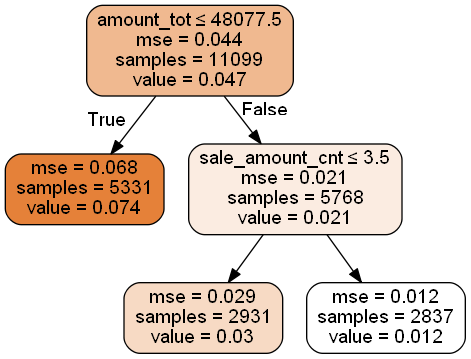

value = badrate

In [19]:

```
sum(fn.bad_ind)/len(fn.bad_ind)
```

Out[19]:

```
0.04658077304261645
```